# Bibliotecas Usadas

In [23]:
from os.path import exists
from os import environ
environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.neural_network import MLPClassifier
import project_metrics.project_metrics as metrics
import numpy as np
import pandas as pd
import pickle
import joblib


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier



# Separando os Dados

In [ ]:
import pandas as pd

## Carregando o Dataset

In [ ]:
df = pd.read_csv("TRNcod.xls",sep="\t")
print(f"DATAFRAME SIZE: {len(df)}")

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.tail()

## Separando o Dataframe em Classes

In [ ]:
df_1_1=df[df["IND_BOM_1_1"]==1]
df_1_2=df[df["IND_BOM_1_2"]==1]
print("DATAFRAME SIZE:")
print(f"IND_BOM_1_1: {len(df_1_1)}")
print(f"IND_BOM_1_2: {len(df_1_2)}")

## Aleatorizando o Dataframe

In [ ]:
df_1_1=df_1_1.sample(frac=1, random_state=1).reset_index(drop=True)
df_1_2=df_1_2.sample(frac=1, random_state=1).reset_index(drop=True)

## Separando os Dados em Treino validação e teste

### IND_BOM_1_1

In [ ]:
df_1_1_train = df_1_1.sample(frac=0.5)
df_1_1 = df_1_1.drop(df_1_1_train.index)
df_1_1_val = df_1_1.sample(frac=0.5)
df_1_1_test = df_1_1.drop(df_1_1_val.index)

df_1_1_train = df_1_1_train.reset_index(drop=True)
df_1_1_val = df_1_1_val.reset_index(drop=True)
df_1_1_test = df_1_1_test.reset_index(drop=True)

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_1_train)}")
print(f"VALIDATION DATA: {len(df_1_1_val)}")
print(f"TEST DATA: {len(df_1_1_test)}")

### IND_BOM_1_2

In [ ]:
df_1_2_train = df_1_2.sample(frac=0.5)
df_1_2 = df_1_2.drop(df_1_2_train.index)
df_1_2_val = df_1_2.sample(frac=0.5)
df_1_2_test = df_1_2.drop(df_1_2_val.index)

df_1_2_train = df_1_2_train.reset_index(drop=True)
df_1_2_val = df_1_2_val.reset_index(drop=True)
df_1_2_test = df_1_2_test.reset_index(drop=True)

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_2_train)}")
print(f"VALIDATION DATA: {len(df_1_2_val)}")
print(f"TEST DATA: {len(df_1_2_test)}")

## Concatenando o Dataset com a Classe Minoritária com Suas Primeiras Linhas

In [ ]:
df_1_2_train = pd.concat((df_1_2_train, df_1_2_train.iloc[:len(df_1_1_train)-len(df_1_2_train)]), axis = 0)
df_1_2_val = pd.concat((df_1_2_val, df_1_2_val.iloc[:len(df_1_1_val)-len(df_1_2_val)]), axis = 0)

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_2_train)}")
print(f"VALIDATION DATA: {len(df_1_2_val)}")
print(f"TEST DATA: {len(df_1_2_test)}")

## Juntando os Datasets Contendo Ambas as Classes

In [ ]:
train_data = pd.concat((df_1_1_train, df_1_2_train), axis = 0)
val_data = pd.concat((df_1_1_val, df_1_2_val), axis = 0)
test_data = pd.concat((df_1_1_test, df_1_2_test), axis = 0)

train_data = train_data.sample(frac=1, random_state=1).reset_index(drop=True)
val_data = val_data.sample(frac=1, random_state=1).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=1).reset_index(drop=True

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(train_data)}")
print(f"VALIDATION DATA: {len(val_data)}")
print(f"TEST DATA: {len(test_data)}")

## Checando se Os Passos Foram Executados Corretamente

### Checando por Interseção Entre os Dados

In [ ]:
train_index = set(train_data["INDEX"])
val_index = set(val_data["INDEX"])
test_index = set(test_data["INDEX"])

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_2_train)}")
print(f"VALIDATION DATA: {len(df_1_2_val)}")
print(f"TEST DATA: {len(df_1_2_test)}")

In [ ]:
train_val_intersection = train_index.intersection(val_index)
train_test_intersection = train_index.intersection(test_index)
val_test_intersection = val_index.intersection(test_index)

assert not train_val_intersection, f"Intersection {train_val_intersection} found between train and validation datasets!"
assert not train_test_intersection, f"Intersection {train_test_intersection} found between train and test datasets!"
assert not train_test_intersection, f"Intersection {val_test_intersection} found between validation and test datasets!"

### Checando se Ambas as Classes Possuem a Mesma Quantidade de Dados

In [ ]:
assert len(train_data[train_data["IND_BOM_1_1"]==1]) == len(train_data[train_data["IND_BOM_1_2"]==1]), "Train data classes have mismatching sizes!"
assert len(val_data[val_data["IND_BOM_1_1"]==1]) == len(val_data[val_data["IND_BOM_1_2"]==1]), "Validation data classes have mismatching sizes!"

## Salvando Dados para Arquivo CSV

In [ ]:
ASSETS_FOLDER = "Assets"
TRAIN_DATA_CSV = f"{ASSETS_FOLDER}/train.csv"
VAL_DATA_CSV = f"{ASSETS_FOLDER}/val.csv"
TEST_DATA_CSV = f"{ASSETS_FOLDER}/train.csv"

if not (exists(TRAIN_DATA_CSV) and exists(VAL_DATA_CSV) and exists(TEST_DATA_CSV)):
    train_data.to_csv(TRAIN_DATA_CSV)
    val_data.to_csv(VAL_DATA_CSV)
    test_data.to_csv(TEST_DATA_CSV)

# Carregando os dados que Foram Previamente Separados

In [24]:
df_train = pd.read_csv("Assets/train.csv")
df_val= pd.read_csv("Assets/val.csv")
df_test = pd.read_csv("Assets/test.csv")

df_train.drop("INDEX", inplace=True, axis =1)
df_val.drop("INDEX", inplace=True, axis =1)
df_test.drop("INDEX", inplace=True, axis =1)

df_train.drop("Unnamed: 0", inplace=True, axis =1)
df_val.drop("Unnamed: 0", inplace=True, axis =1)
df_test.drop("Unnamed: 0", inplace=True, axis =1)

df_train.drop("IND_BOM_1_2", inplace=True, axis =1)
df_val.drop("IND_BOM_1_2", inplace=True, axis =1)
df_test.drop("IND_BOM_1_2", inplace=True, axis =1)

y_train = df_train["IND_BOM_1_1"].values
y_val = df_val["IN# Separando os Dados
import pandas as pd
## Carregando o Dataset
df = pd.read_csv("TRNcod.xls",sep="\t")
print(f"DATAFRAME SIZE: {len(df)}")
df.describe()
df.head()
df.tail()
## Separando o Dataframe em Classes
df_1_1=df[df["IND_BOM_1_1"]==1]
df_1_2=df[df["IND_BOM_1_2"]==1]
print("DATAFRAME SIZE:")
print(f"IND_BOM_1_1: {len(df_1_1)}")
print(f"IND_BOM_1_2: {len(df_1_2)}")
## Aleatorizando o Dataframe
df_1_1=df_1_1.sample(frac=1, random_state=1).reset_index(drop=True)
df_1_2=df_1_2.sample(frac=1, random_state=1).reset_index(drop=True)
## Separando os Dados em Treino validação e teste
### IND_BOM_1_1
df_1_1_train = df_1_1.sample(frac=0.5)
df_1_1 = df_1_1.drop(df_1_1_train.index)
df_1_1_val = df_1_1.sample(frac=0.5)
df_1_1_test = df_1_1.drop(df_1_1_val.index)

df_1_1_train = df_1_1_train.reset_index(drop=True)
df_1_1_val = df_1_1_val.reset_index(drop=True)
df_1_1_test = df_1_1_test.reset_index(drop=True)

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_1_train)}")
print(f"VALIDATION DATA: {len(df_1_1_val)}")
print(f"TEST DATA: {len(df_1_1_test)}")
### IND_BOM_1_2
df_1_2_train = df_1_2.sample(frac=0.5)
df_1_2 = df_1_2.drop(df_1_2_train.index)
df_1_2_val = df_1_2.sample(frac=0.5)
df_1_2_test = df_1_2.drop(df_1_2_val.index)

df_1_2_train = df_1_2_train.reset_index(drop=True)
df_1_2_val = df_1_2_val.reset_index(drop=True)
df_1_2_test = df_1_2_test.reset_index(drop=True)

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_2_train)}")
print(f"VALIDATION DATA: {len(df_1_2_val)}")
print(f"TEST DATA: {len(df_1_2_test)}")
## Concatenando o Dataset com a Classe Minoritária com Suas Primeicas Linhas
df_1_2_train = pd.concat((df_1_2_train, df_1_2_train.iloc[:len(df_1_1_train)-len(df_1_2_train)]), axis = 0)
df_1_2_val = pd.concat((df_1_2_val, df_1_2_val.iloc[:len(df_1_1_val)-len(df_1_2_val)]), axis = 0)

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_2_train)}")
print(f"VALIDATION DATA: {len(df_1_2_val)}")
print(f"TEST DATA: {len(df_1_2_test)}")
## Juntando os Datasets Contendo Ambas as Classes
train_data = pd.concat((df_1_1_train, df_1_2_train), axis = 0)
val_data = pd.concat((df_1_1_val, df_1_2_val), axis = 0)
test_data = pd.concat((df_1_1_test, df_1_2_test), axis = 0)

train_data = train_data.sample(frac=1, random_state=1).reset_index(drop=True)
val_data = val_data.sample(frac=1, random_state=1).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=1).reset_index(drop=True

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(train_data)}")
print(f"VALIDATION DATA: {len(val_data)}")
print(f"TEST DATA: {len(test_data)}")
## Checando se Os Passos Foram Executados Corretamente
### Checando por Interseção Entre os Dados
train_index = set(train_data["INDEX"])
val_index = set(val_data["INDEX"])
test_index = set(test_data["INDEX"])

print("DATAFRAME SIZE:")
print(f"TRAIN DATA: {len(df_1_2_train)}")
print(f"VALIDATION DATA: {len(df_1_2_val)}")
print(f"TEST DATA: {len(df_1_2_test)}")
train_val_intersection = train_index.intersection(val_index)
train_test_intersection = train_index.intersection(test_index)
val_test_intersection = val_index.intersection(test_index)

assert not train_val_intersection, f"Intersection {train_val_intersection} found between train and validation datasets!"
assert not train_test_intersection, f"Intersection {train_test_intersection} found between train and test datasets!"
assert not train_test_intersection, f"Intersection {val_test_intersection} found between validation and test datasets!"D_BOM_1_1"].values
y_test = df_test["IND_BOM_1_1"].values

df_train.drop("IND_BOM_1_1", inplace=True, axis =1)
df_val.drop("IND_BOM_1_1", inplace=True, axis =1)
df_test.drop("IND_BOM_1_1", inplace=True, axis =1)

x_train = df_train.values
x_val = df_val.values
x_test = df_test.values

x_train.shape

(255098, 243)

# Algoritmos de Aprendizado de Máquina

## MLP

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

MODELS_PATH = "Models/MLP"
HISTORY_PATH = f"{MODELS_PATH}/history"
MODEL_PATH = f"{MODELS_PATH}/model"

### Experimento1

In [26]:

input_dim = x_train.shape[1]

classifier = Sequential()

classifier.add(Dense(16, activation='relu', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "1.npy"
model_file = MODEL_PATH + "1"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=10_000, callbacks=[EarlyStopping(patience=10,verbose=1)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 2s 555us/step
Matriz de confusão no conjunto de teste:


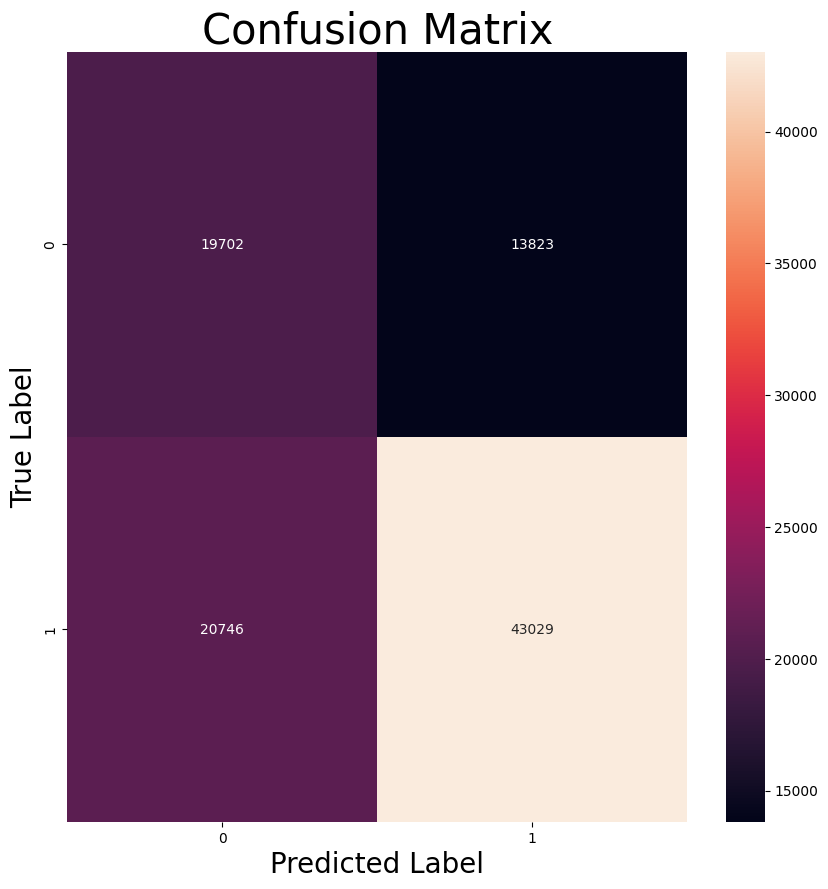


Train Loss:       0.2187
Validation Loss:  0.2214

Performance no conjunto de teste:


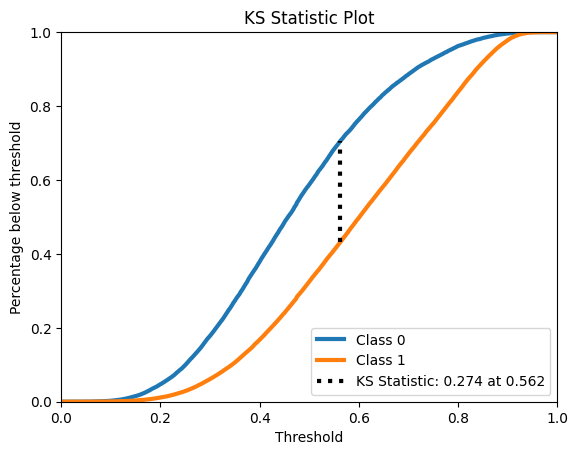


Accuracy:         0.6447
Recall:           0.6747
Precision:        0.7569
F1:               0.7134
AUROC:            0.6887
AUPR:             0.8014


In [27]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento2

In [28]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(256, activation='relu', input_dim=input_dim))
classifier.add(Dense(128, activation='relu', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "2.npy"
model_file = MODEL_PATH + "2"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=10_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 2s 690us/step
Matriz de confusão no conjunto de teste:


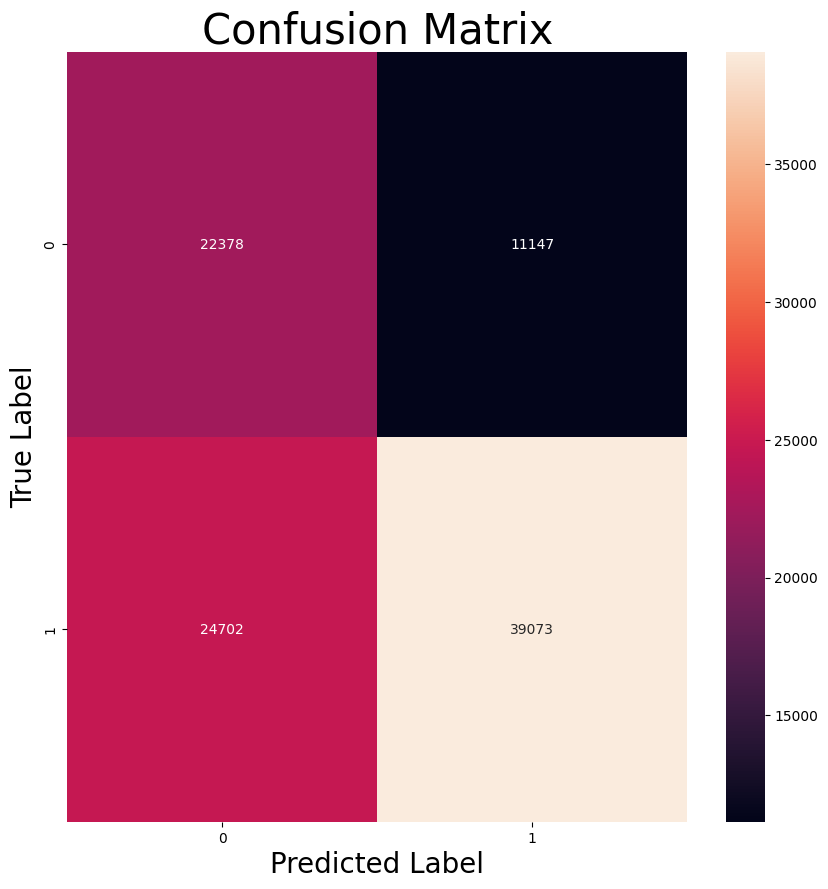


Train Loss:       0.2206
Validation Loss:  0.2213

Performance no conjunto de teste:


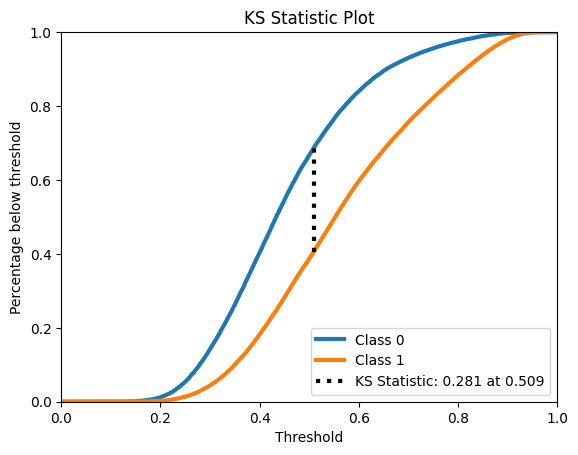


Accuracy:         0.6316
Recall:           0.6127
Precision:        0.7780
F1:               0.6855
AUROC:            0.6921
AUPR:             0.8042


In [29]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento3

In [30]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(512, activation='sigmoid', input_dim=input_dim))
classifier.add(Dense(256, activation='sigmoid', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))

optimizer=keras.optimizers.SGD( learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='mean_squared_error')

history_file = HISTORY_PATH + "3.npy"
model_file = MODEL_PATH + "3"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 3s 981us/step
Matriz de confusão no conjunto de teste:


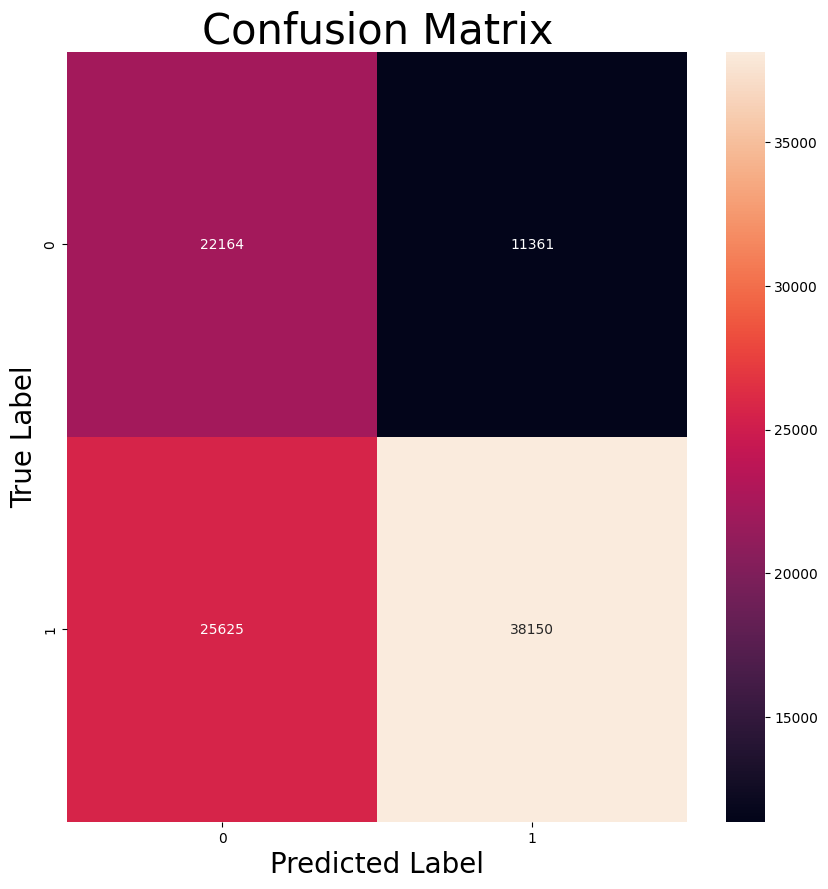


Train Loss:       0.2258
Validation Loss:  0.2255

Performance no conjunto de teste:


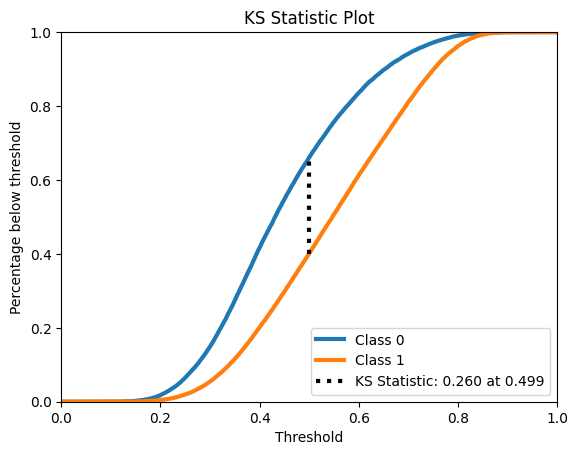


Accuracy:         0.6199
Recall:           0.5982
Precision:        0.7705
F1:               0.6735
AUROC:            0.6774
AUPR:             0.7885


In [31]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento4

In [32]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(512, activation='tanh', input_dim=input_dim))
classifier.add(Dense(256, activation='tanh', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))

optimizer=keras.optimizers.SGD( learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='mean_squared_error')

history_file = HISTORY_PATH + "4.npy"
model_file = MODEL_PATH + "4"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 3s 950us/step
Matriz de confusão no conjunto de teste:


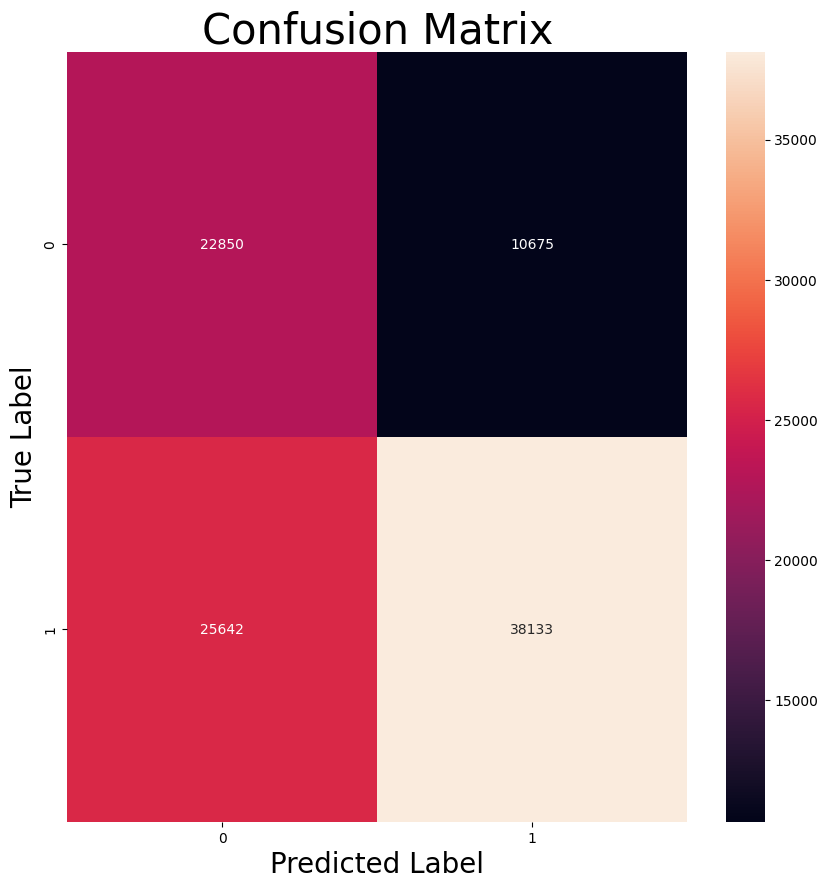


Train Loss:       0.2174
Validation Loss:  0.2212

Performance no conjunto de teste:


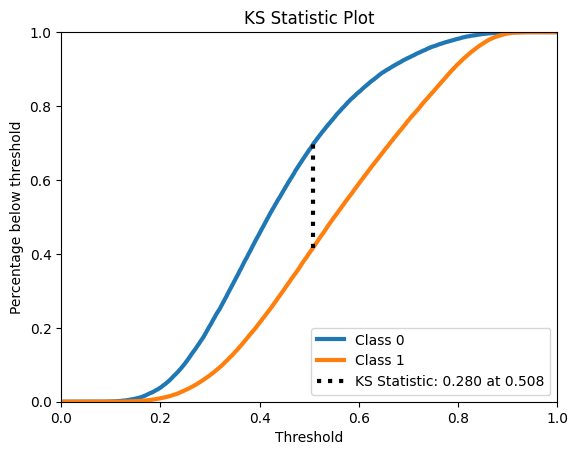


Accuracy:         0.6268
Recall:           0.5979
Precision:        0.7813
F1:               0.6774
AUROC:            0.6925
AUPR:             0.8028


In [33]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento5

In [34]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(1024, activation='tanh', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "5.npy"
model_file = MODEL_PATH + "5"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 3s 1ms/step
Matriz de confusão no conjunto de teste:


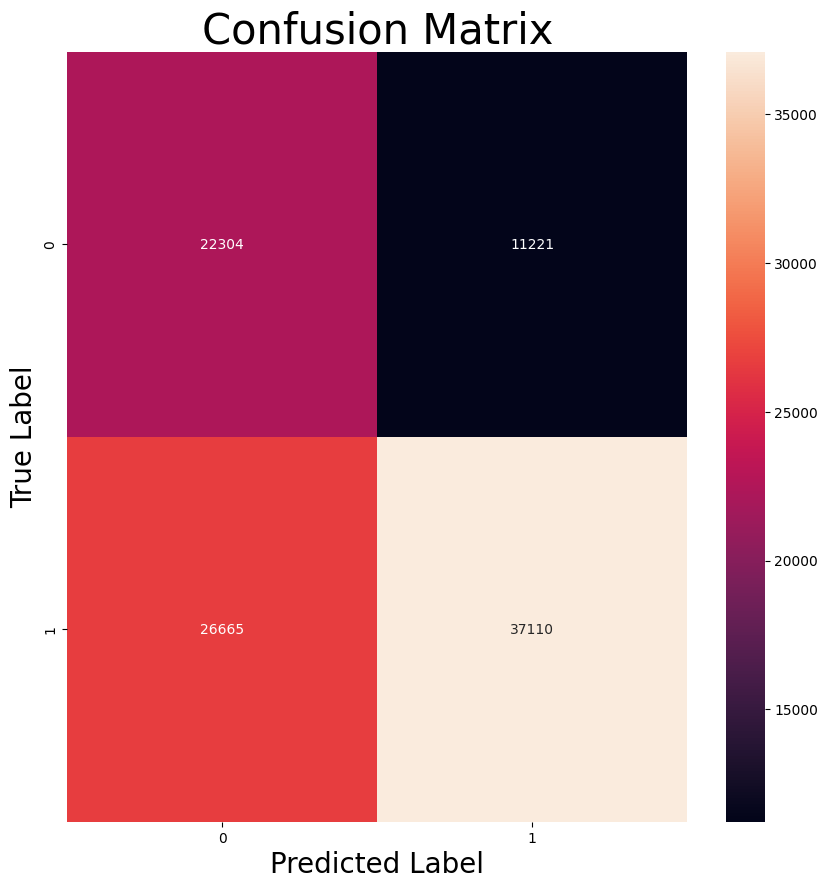


Train Loss:       0.2259
Validation Loss:  0.2234

Performance no conjunto de teste:


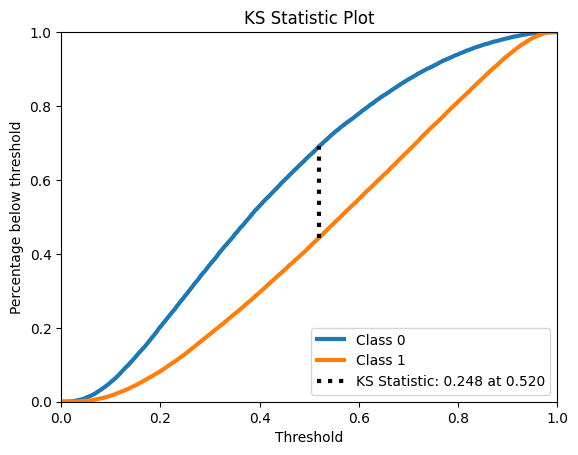


Accuracy:         0.6106
Recall:           0.5819
Precision:        0.7678
F1:               0.6621
AUROC:            0.6690
AUPR:             0.7847


In [35]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## MLP Ensemble

In [36]:
MLP_ENS_PATH = "Models/MLP_ENS"
MLP_MODEL_ENS_PATH = f"{MLP_ENS_PATH}/model"

### Experimento1

In [37]:
mlp = MLPClassifier(verbose=True)
mlp1 = MLPClassifier(verbose=True)
mlp2 = MLPClassifier(verbose=True)

model_file = MLP_MODEL_ENS_PATH+"1"
if not exists(model_file):
    mlp_ns = mlp.fit(x_train,y_train)
    mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp1)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(MLP_MODEL_ENS_PATH+"1", 'wb') as file:
        pickle.dump(mlp_ens,file)
    with open(MLP_MODEL_ENS_PATH+"ns"+"1", 'wb') as file:
        pickle.dump(mlp_ns,file)
else:
    print("Model was already trained")
    with open(MLP_MODEL_ENS_PATH+"1", 'rb') as file:
        mlp_ens = pickle.load(file)
    with open(MLP_MODEL_ENS_PATH+"ns"+"1", 'rb') as file:
        mlp_ns= pickle.load(file)

Model was already trained


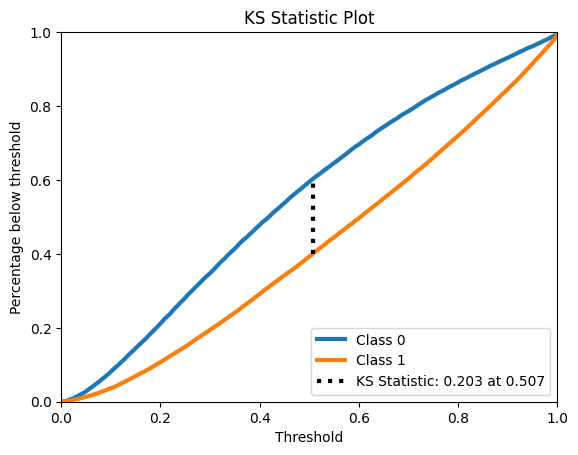

Performance no conjunto de validação:

Accuracy:         0.6031
Recall:           0.6074
Precision:        0.7405
F1:               0.6674
AUROC:            0.6362
AUPR:             0.7523


In [38]:
mlp_pred_class = mlp_ns.predict(x_test)
mlp_pred_scores = mlp_ns.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

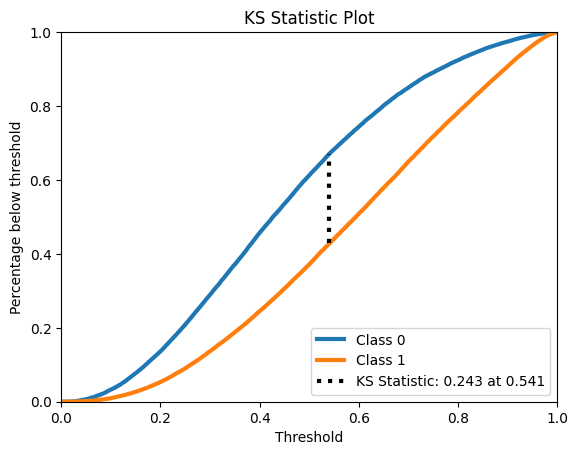

Performance no conjunto de validação:

Accuracy:         0.6231
Recall:           0.6285
Precision:        0.7554
F1:               0.6861
AUROC:            0.6652
AUPR:             0.7821


In [39]:
mlp_pred_class = mlp_ens.predict(x_test)
mlp_pred_scores = mlp_ens.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento2

In [40]:
mlp1 = MLPClassifier(activation="relu",verbose=True)
mlp2 = MLPClassifier(activation="logistic", verbose=True)
mlp3 = MLPClassifier(activation="tanh", verbose=True)

model_file = MLP_MODEL_ENS_PATH+"2"
if not exists(model_file):
    mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(mlp_ens,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        mlp_ens = pickle.load(file)

Model was already trained


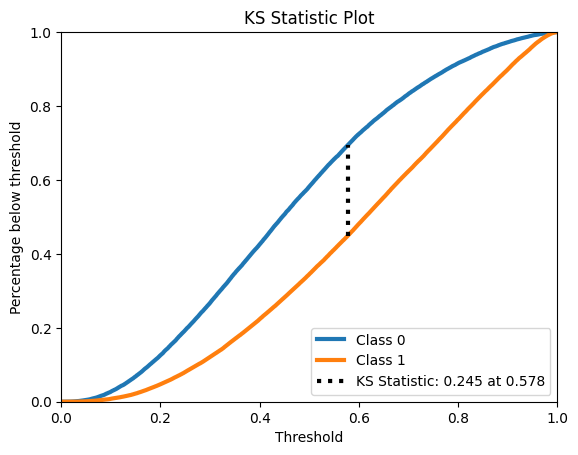

Performance no conjunto de validação:

Accuracy:         0.6299
Recall:           0.6550
Precision:        0.7489
F1:               0.6988
AUROC:            0.6665
AUPR:             0.7825


In [41]:
mlp_pred_class = mlp_ens.predict(x_test)
mlp_pred_scores = mlp_ens.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento3

In [42]:
mlp1 = MLPClassifier(solver="lbfgs",verbose=True)
mlp2 = MLPClassifier(solver="sgd", verbose=True)
mlp3 = MLPClassifier(solver="adam", verbose=True)

model_file = MLP_MODEL_ENS_PATH+"3"
if not exists(model_file):
    mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(mlp_ens,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        mlp_ens = pickle.load(file)

Model was already trained


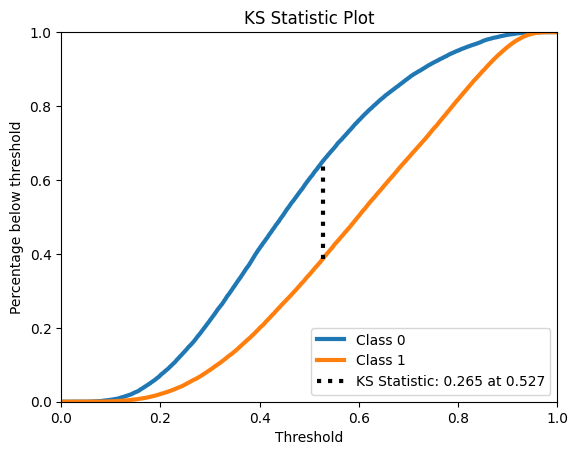

Performance no conjunto de validação:

Accuracy:         0.6378
Recall:           0.6562
Precision:        0.7586
F1:               0.7037
AUROC:            0.6820
AUPR:             0.7963


In [43]:
mlp_pred_class = mlp_ens.predict(x_test)
mlp_pred_scores = mlp_ens.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento4

In [44]:
# mlp1 = MLPClassifier(hidden_layer_size=(16,), activation="relu", solver="adam", verbose=True)
# mlp2 = MLPClassifier(hidden_layer_size=(64,32), activation="tanh", solver="sgd", verbose=True)
# mlp3 = MLPClassifier(activation="logistic", solver="sgd", verbose=True)

# model_file = MLP_MODEL_ENS_PATH+"4"
# if not exists(model_file):
#     mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')
#     mlp_ens.fit(x_train,y_train)
#     with open(model_file, 'wb') as file:
#         pickle.dump(mlp_ens,file)
# else:
#     print("Model was already trained")
#     with open(model_file, 'rb') as file:
#         mlp_ens = pickle.load(file)

In [45]:
# mlp_pred_class = mlp_ens.predict(x_test)
# mlp_pred_scores = mlp_ens.predict_proba(x_test)
# accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
# print('Performance no conjunto de validação:')
# metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## Gradient Boosting

In [46]:
GB_PATH = "Models/GB"
GB_MODEL_PATH = f"{GB_PATH}/model"

### Experimento1

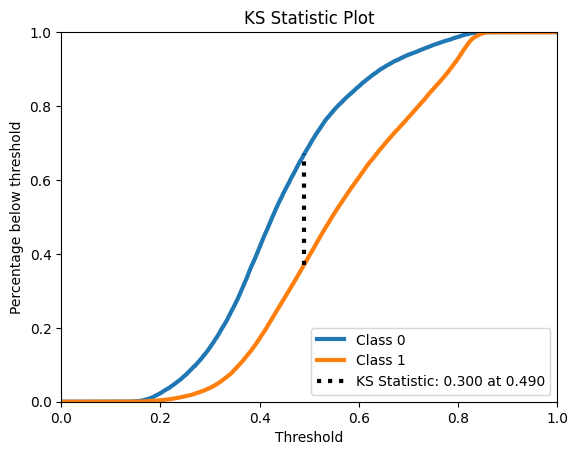


Accuracy:         0.6354
Recall:           0.6049
Precision:        0.7896
F1:               0.6850
AUROC:            0.7054
AUPR:             0.8101


In [47]:
gb_clf = GradientBoostingClassifier()  

model_file = GB_MODEL_PATH+"1"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)
        
gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento2

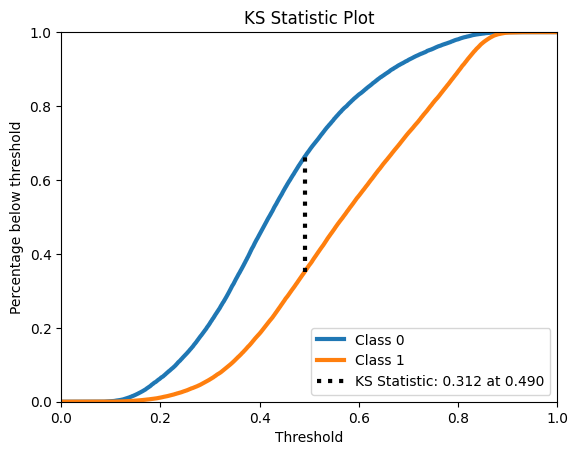


Accuracy:         0.6475
Recall:           0.6302
Precision:        0.7895
F1:               0.7009
AUROC:            0.7130
AUPR:             0.8162


In [48]:
gb_clf = GradientBoostingClassifier(n_estimators=500)  

model_file = GB_MODEL_PATH+"2"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento3

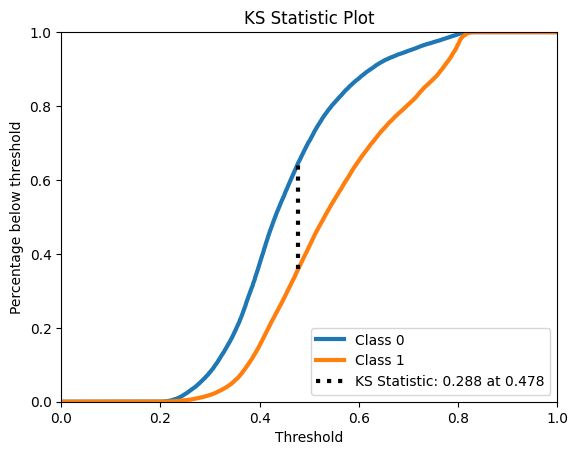


Accuracy:         0.6227
Recall:           0.5794
Precision:        0.7889
F1:               0.6681
AUROC:            0.6982
AUPR:             0.8054


In [49]:
gb_clf = GradientBoostingClassifier(n_estimators=50)

model_file = GB_MODEL_PATH+"3"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento4

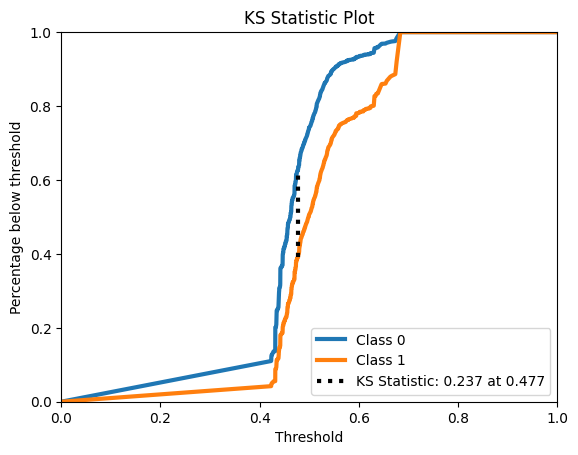


Accuracy:         0.5785
Recall:           0.4924
Precision:        0.7843
F1:               0.6050
AUROC:            0.6666
AUPR:             0.7870


In [50]:
gb_clf = GradientBoostingClassifier(n_estimators=10)

model_file = GB_MODEL_PATH+"4"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento5

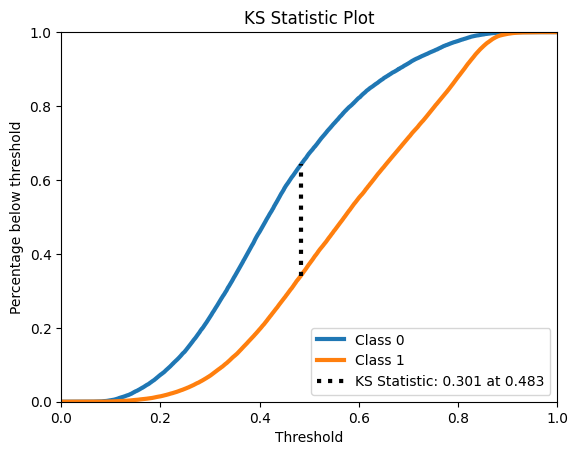


Accuracy:         0.6428
Recall:           0.6273
Precision:        0.7845
F1:               0.6972
AUROC:            0.7074
AUPR:             0.8122


In [51]:
gb_clf = GradientBoostingClassifier(learning_rate=0.5)

model_file = GB_MODEL_PATH+"5"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento6

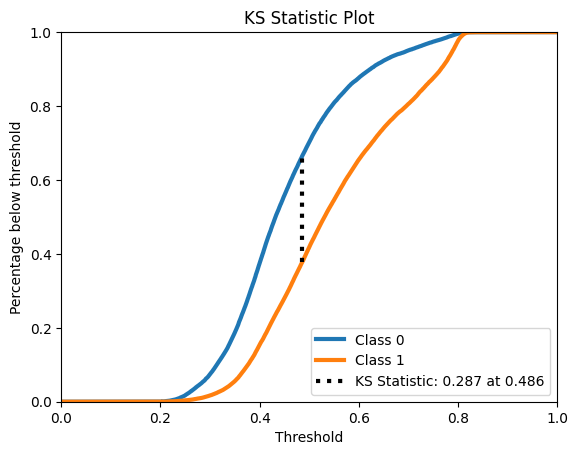


Accuracy:         0.6235
Recall:           0.5816
Precision:        0.7885
F1:               0.6694
AUROC:            0.6982
AUPR:             0.8056


In [52]:
gb_clf = GradientBoostingClassifier(learning_rate=0.05)  

model_file = GB_MODEL_PATH+"6"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento7

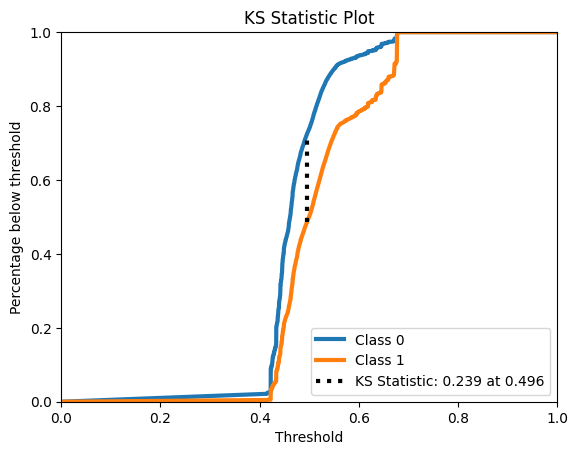


Accuracy:         0.5813
Recall:           0.4982
Precision:        0.7843
F1:               0.6093
AUROC:            0.6704
AUPR:             0.7891


In [53]:
gb_clf = GradientBoostingClassifier(learning_rate=0.01)  

model_file = GB_MODEL_PATH+"7"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## Random Forest

## Ensemble Misto

In [54]:
MIX_ENS_PATH = "Models/MIX_ENS"
MIX_ENS_MODEL_PATH = f"{MIX_ENS_PATH}/model"

### Experimento1

In [55]:
gb = GradientBoostingClassifier()
mlp = MLPClassifier()
rf = RandomForestClassifier()

model_file = MIX_ENS_MODEL_PATH+"1"
if not exists(model_file):
    mlp_ens = VotingClassifier([('gb', gb), ('mlp', mlp), ('rf', rf)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(mlp_ens,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        mlp_ens = pickle.load(file)

/home/yesternight/Desktop/neural-networks/neural-networks/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## SVC